<a href="https://colab.research.google.com/github/KKOUWE/NumMet-Network-Design-Physarum-polycephalum-Ph/blob/main/AI_assisted_computations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

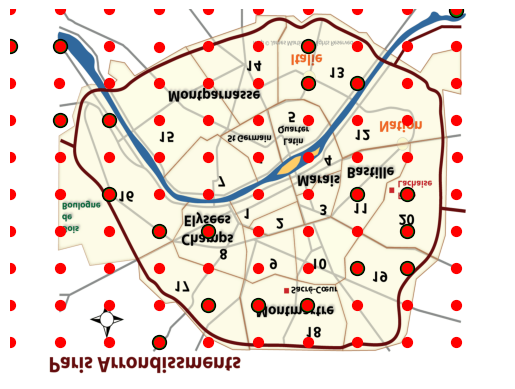

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import matplotlib.image as mpimg

## Parameters for flexibility
rows = 10
cols = 10
min_distance = np.sqrt(2)  # Minimum distance for creating edges
sd = 0.2  # Standard deviation for noise in the grid positions
food_source_radius = 1.0  # Radius around nodes to represent food sources
tube_size = 0.1  # Starting tube size
dt = 0.01  # Time step for tube size change
scaling_factor = 1  # Factor to scale the map size later
grid_offset = (0, 0)  # Offset for shifting grid over the image if needed

# Create an empty graph
G = nx.Graph()

# Load background image
img = mpimg.imread('map_paris.png')  # Change this path to your image file

# Get the image dimensions (height and width)
img_height, img_width, _ = img.shape

# Define grid spacing based on image dimensions
x_spacing = img_width / cols  # Horizontal distance between nodes
y_spacing = img_height / rows  # Vertical distance between nodes

# Add nodes in a grid with noise
pos = {}
for i in range(rows):
    for j in range(cols):
        G.add_node((i, j))
        # Adjust positions of nodes to fit within the image size
        pos[(i, j)] = (
            j * x_spacing + np.random.normal(loc=0, scale=sd),  # X position
            i * y_spacing + np.random.normal(loc=0, scale=sd)   # Y position
        )

# Add edges based on distance between nodes
for i in range(rows):
    for j in range(cols):
        pos_center = pos.get((i, j))
        for x in range(rows):
            for y in range(cols):
                if (x, y) != (i, j):
                    pos_nb = pos.get((x, y))
                    distance = np.sqrt((pos_center[0] - pos_nb[0]) ** 2 + (pos_center[1] - pos_nb[1]) ** 2)
                    if distance <= min_distance:
                        G.add_edge((i, j), (x, y))

# --- Food Sources Implementation (FS) ---
food_sources = {}
for node in G.nodes():
    if np.random.rand() < 0.2:  # 20% chance to be a food source
        food_sources[node] = np.array(pos[node]) + np.random.normal(0, 0.2, 2)  # Slight noise

# --- Tube Size (TS) Evolution ---
def update_tube_size(tube_size, dt):
    # Increase tube size over time (adjust this function as needed)
    return tube_size + dt

tube_size = update_tube_size(tube_size, dt)

# --- Plotting ---
# Set up the plot with image background
fig, ax = plt.subplots()
ax.imshow(img, extent=[0, img_width, 0, img_height], aspect='auto')

# Plot nodes (positions) and edges
nx.draw(G, pos, ax=ax, node_size=50, node_color="red", with_labels=False, edge_color='gray')

# Plot food sources
for fs in food_sources.values():
    ax.scatter(fs[0], fs[1], color="green", s=100, label="Food Source", edgecolors="black")

# Customize plot to ensure grid fits over the image
ax.set_xlim(0, img_width)
ax.set_ylim(img_height, 0)  # Reverse the y-axis to match image coordinates

# Show the plot
#plt.legend(loc="upper right")
plt.show()

Top 10 Optimized Routes (Edge, Nutrient Concentration):
Edge (6, 5) with nutrient concentration: 0.28
Edge (6, 26) with nutrient concentration: 0.28
Edge (6, 7) with nutrient concentration: 0.28
Edge (22, 21) with nutrient concentration: 0.25
Edge (22, 20) with nutrient concentration: 0.25
Edge (22, 27) with nutrient concentration: 0.25
Edge (13, 18) with nutrient concentration: 0.25
Edge (13, 14) with nutrient concentration: 0.25
Edge (5, 15) with nutrient concentration: 0.24
Edge (5, 17) with nutrient concentration: 0.24


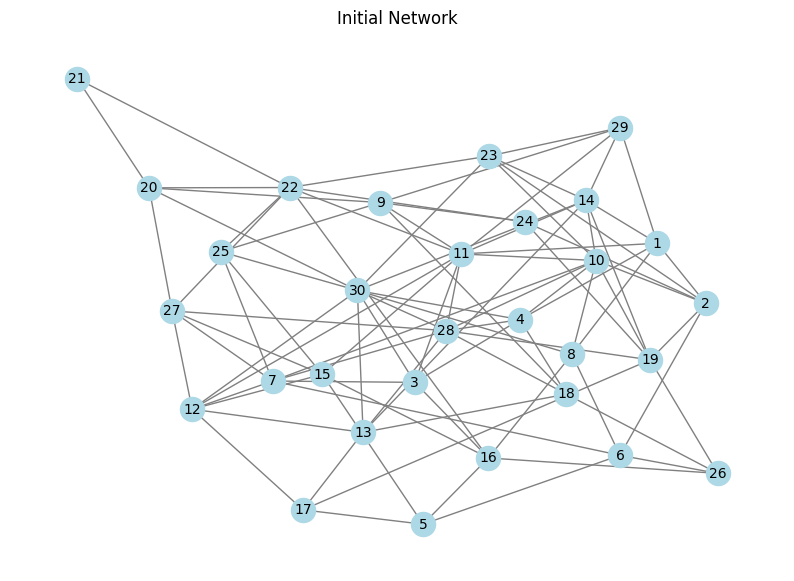

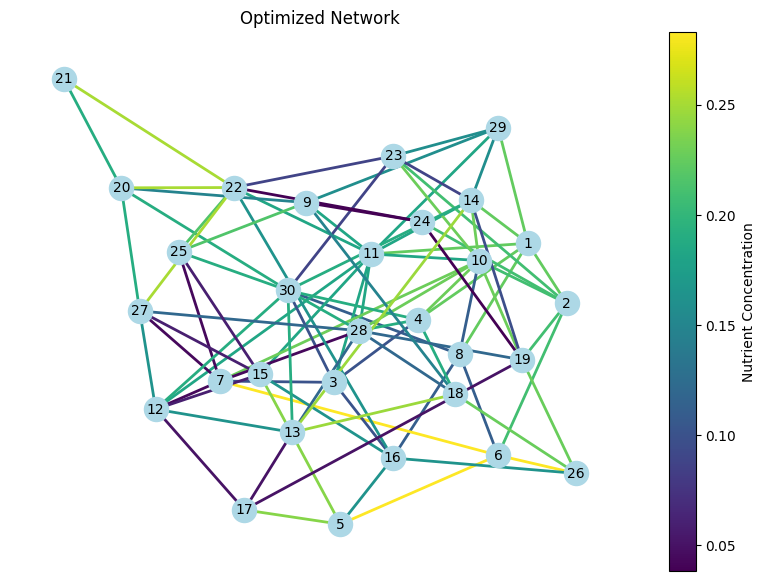

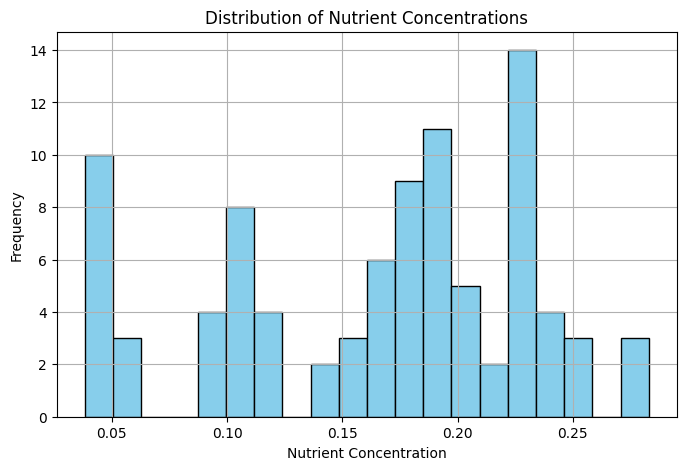

In [5]:
import networkx as nx
import numpy as np

# Initialize the graph with nodes and edges
G = nx.Graph()
nodes = range(1, 31)  # Example: 30 nodes representing locations

# Randomly create weighted edges between nodes
np.random.seed(42)  # For reproducibility
edges = [(i, j, np.random.uniform(1, 10)) for i in nodes for j in nodes if i != j and np.random.rand() < 0.1]
G.add_weighted_edges_from(edges)

# Define initial parameters
nutrient_concentration = {edge: 0.1 for edge in G.edges()}
affinity = {node: np.random.uniform(0.1, 1.0) for node in G.nodes()}
learning_rate = 0.2
neighbor_rate = 0.4
iterations = 100

def expand_phase(G, nutrient_concentration, affinity, learning_rate):
    """
    Simulates the expansion phase where Physarum agents explore and increase nutrient concentration.
    """
    for node in G.nodes():
        for neighbor in G.neighbors(node):
            edge = (node, neighbor)
            if edge in nutrient_concentration:
                # Increase nutrient concentration based on the affinity of the current node
                nutrient_concentration[edge] += learning_rate * affinity[node]
    return nutrient_concentration

def contract_phase(G, nutrient_concentration, neighbor_rate):
    """
    Simulates the contraction phase where nutrient concentrations decay over time.
    """
    for edge in nutrient_concentration:
        # Decrease nutrient concentration to simulate consumption
        nutrient_concentration[edge] *= (1 - neighbor_rate)
    return nutrient_concentration

# Iteratively optimize the logistics network
for _ in range(iterations):
    nutrient_concentration = expand_phase(G, nutrient_concentration, affinity, learning_rate)
    nutrient_concentration = contract_phase(G, nutrient_concentration, neighbor_rate)

# Sort the edges by nutrient concentration to identify the most efficient routes
optimized_routes = sorted(nutrient_concentration.items(), key=lambda x: x[1], reverse=True)

# Display the optimized routes with the highest nutrient concentrations
print("Top 10 Optimized Routes (Edge, Nutrient Concentration):")
for edge, concentration in optimized_routes[:10]:
    print(f"Edge {edge} with nutrient concentration: {concentration:.2f}")


    #######
import matplotlib.pyplot as plt

def plot_graph(G, title, nutrient_concentration=None):
    """
    Plots the network graph, highlighting edges based on nutrient concentration.
    """
    pos = nx.spring_layout(G, seed=42)  # Layout for node positioning
    plt.figure(figsize=(10, 7))
    plt.title(title)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')

    if nutrient_concentration:
        # Normalize the concentrations for coloring
        max_concentration = max(nutrient_concentration.values())
        min_concentration = min(nutrient_concentration.values())
        edge_colors = [
            (nutrient_concentration[edge] - min_concentration) / (max_concentration - min_concentration + 1e-6)
            for edge in G.edges()
        ]

        # Draw edges with color mapping based on nutrient concentration
        edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, width=2)

        # Create a ScalarMappable object for the colorbar
        sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min_concentration, vmax=max_concentration))
        sm.set_array([])  # Needed for the colorbar to work
        cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
        cbar.set_label('Nutrient Concentration')
    else:
        # Draw edges without concentration coloring
        nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    plt.axis('off')
    plt.show()

def plot_nutrient_distribution(nutrient_concentration):
    """
    Plots the distribution of nutrient concentrations on the edges.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(nutrient_concentration.values(), bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Nutrient Concentrations')
    plt.xlabel('Nutrient Concentration')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Visualize the initial network
plot_graph(G, title='Initial Network')

# Visualize the optimized network based on nutrient concentration
plot_graph(G, title='Optimized Network', nutrient_concentration=nutrient_concentration)

# Plot the nutrient concentration distribution
plot_nutrient_distribution(nutrient_concentration)
